In [3]:
#import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [4]:
#read ipl.csv file and print first 5 records
df=pd.read_csv("ipl data.csv")
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#check total number of columns,entries note down your findings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
# find null values 
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
df=df.dropna(subset=["city"])
df=df.dropna(subset=["winner"])
df=df.dropna(subset=["player_of_match"])
df=df.dropna(subset=["umpire1"])
df=df.dropna(subset=["umpire2"])

In [6]:
#drop umpire3 column as it contains more than 75% of null values
df=df.drop(["umpire3"],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

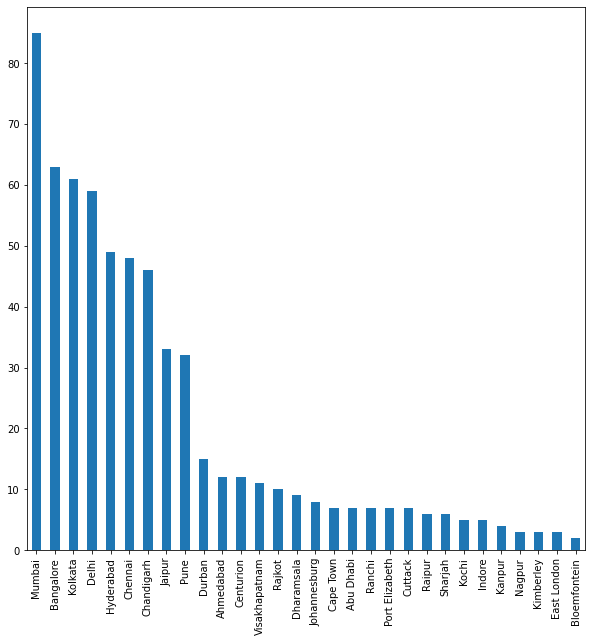

In [7]:
#which city hosted most number of matches?
#draw bar plot and write down your insights

plt.figure(figsize=(10,10))
df["city"].value_counts().plot(kind='bar')
plt.show

In [8]:
#find all venue of mumbai city
df[df['city'] == 'Mumbai']['venue'].unique()

array(['Wankhede Stadium', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

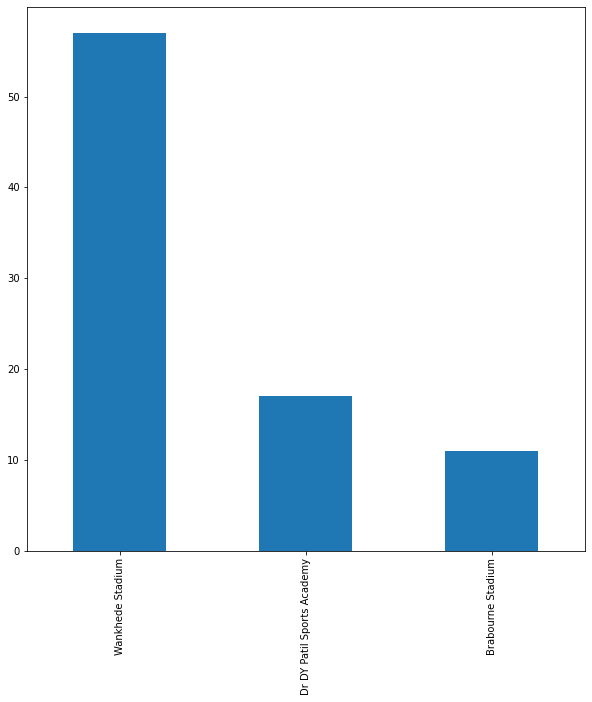

In [9]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)
plt.figure(figsize=(10,10))
df[df['city'] == 'Mumbai']['venue'].value_counts().plot(kind='bar')
plt.show

In [10]:
#what is the preferred choice after winning a toss in mumbai
df[df['city'] == 'Mumbai']['toss_decision'].value_counts()

field    51
bat      34
Name: toss_decision, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

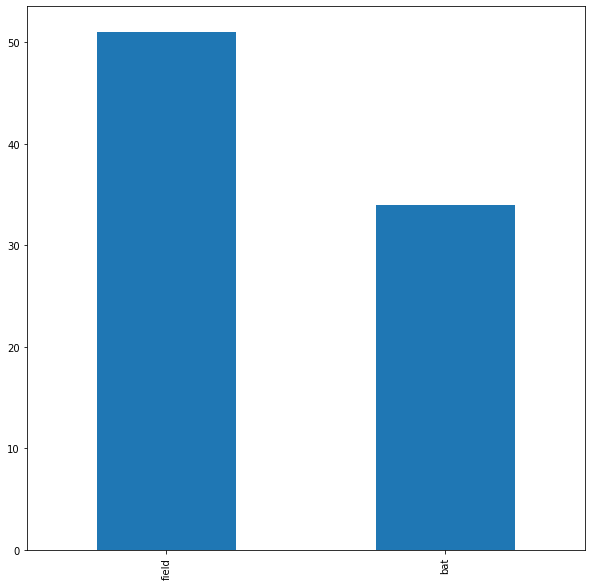

In [11]:
#graphical representation of above question
plt.figure(figsize=(10,10))
df[df['city'] == 'Mumbai']['toss_decision'].value_counts().plot(kind='bar')
plt.show

In [12]:
#which team won most number of toss
df["toss_winner"].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

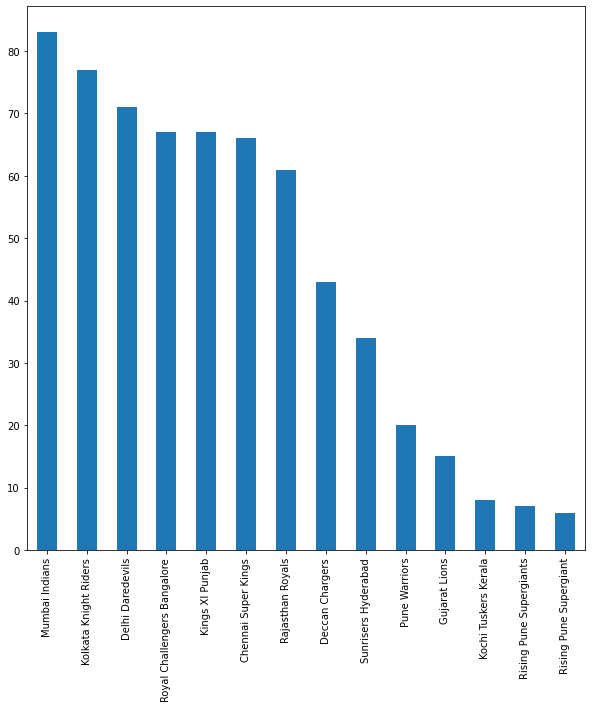

In [13]:
#show graphical representation of above question
plt.figure(figsize=(10,10))
df["toss_winner"].value_counts().plot(kind='bar')
plt.show

In [14]:
#find what mumbai indians preferred after winning a toss?
df[df['toss_winner'] == 'Mumbai Indians']['toss_decision'].value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

In [15]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings
op=["Mumbai Indians","Chennai Super Kings"]
df['winner'][df.team1.isin(op) & df.team2.isin(op)].value_counts()

Mumbai Indians         12
Chennai Super Kings     9
Name: winner, dtype: int64

In [16]:
#Which team won most of the matches in mumbai?
df[df['city'] == 'Mumbai']['winner'].value_counts()

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Rising Pune Supergiant          2
Delhi Daredevils                2
Kochi Tuskers Kerala            1
Sunrisers Hyderabad             1
Rising Pune Supergiants         1
Gujarat Lions                   1
Name: winner, dtype: int64

In [17]:
#how many times each team won the toss and won the match


In [22]:
toss_win=df[(df["toss_winner"] == df["winner"])]
toss_win["winner"].value_counts()



Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Rajasthan Royals               34
Delhi Daredevils               33
Royal Challengers Bangalore    33
Kings XI Punjab                27
Deccan Chargers                19
Sunrisers Hyderabad            16
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [18]:
#how many times each team won the toss and won the match in mumbai

In [23]:
toss_win_mumbai=df[(df["toss_winner"] == df["winner"]) & (df.city=="Mumbai")]
toss_win_mumbai["winner"].value_counts()

Mumbai Indians                 26
Chennai Super Kings             5
Deccan Chargers                 3
Rajasthan Royals                2
Delhi Daredevils                2
Royal Challengers Bangalore     2
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Gujarat Lions                   1
Name: winner, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

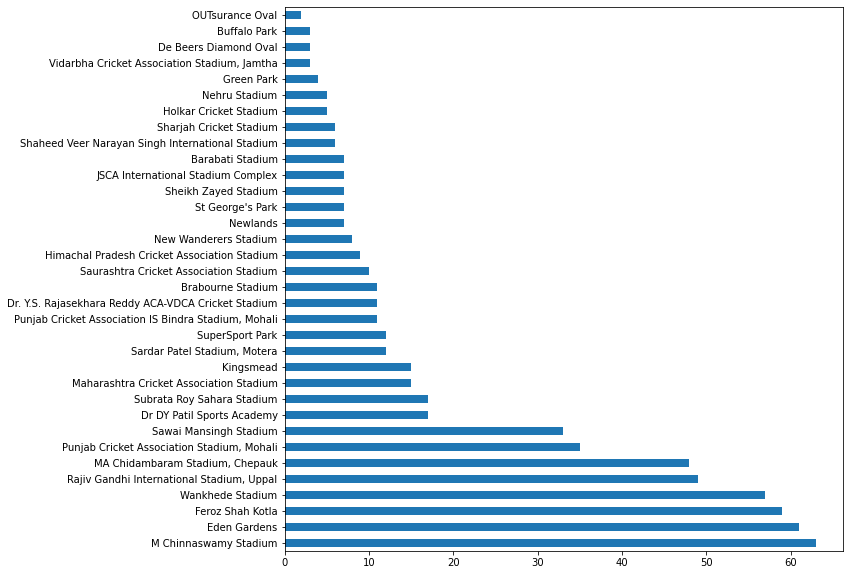

In [19]:
#which venue hosted most number of matches
plt.figure(figsize=(10,10))
df["venue"].value_counts().plot(kind='barh')
plt.show

In [20]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?


In [24]:
chennai_chinnaswamy = df[(df.venue == "M Chinnaswamy Stadium") & ((df.team1 == "Chennai Super Kings") | (df.team2 =="Chennai Super Kings"))]
chennai_chinnaswamy["venue"].value_counts()[0]

7

In [7]:
#who won most matches at M Chinnaswamy stadium?
df[df["venue"]=="M Chinnaswamy Stadium"]["winner"].value_counts()

Royal Challengers Bangalore    30
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

# year wise analysis

In [ ]:
#matches played in each year

In [25]:
df["season"].value_counts()

2013    76
2012    74
2011    72
2010    60
2016    60
2017    58
2008    58
2009    57
2015    57
2014    53
Name: season, dtype: int64

In [ ]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)


In [26]:
a=df[df["season"]==2013]
a 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel


In [27]:
#which city hosted most number of matches in 2013 
a["city"].value_counts()

Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64